In [ ]:
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DatasetPulp.xlsx to DatasetPulp.xlsx


In [ ]:
df=pd.read_excel('DatasetPulp.xlsx')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
0,1,2022-01-01,NAPKIN TISSUE BASIS WEIGHT 18 GSM +/-0.5NAPKIN...,48183000,136.00,RO,16.885,TNE,1,IDPWG,TWKHH,TW
1,2,2022-01-01,NAPKIN TISSUE,48183000,908.00,RO,155.093,TNE,16,IDPWG,GRSKG,GR
2,3,2022-01-01,JUMBO ROLL TISSUE,48183000,484.00,RO,156.500,TNE,21,IDPWG,KRPUS,KR
3,4,2022-01-01,FACIAL TISSUE,48181000,4.39,BL,160.148,TNE,3,IDPWG,AUBNE,AU
4,5,2022-01-01,MULTI PURPOSE TISSUE,48183000,244.00,RO,153.148,TNE,3,IDPWG,VNCLI,VN
...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3777,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3777,3778,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3778,3779,2022-12-31,JUMBO ROLL TISSUE,48183000,80.00,RO,169.635,TNE,2,IDPWG,KRICH,KR
3779,3780,2022-12-31,JUMBO TOILET TISSUE IN REELS,48183000,126.00,RO,97.740,TNE,7,IDPWG,ZADUR,ZA


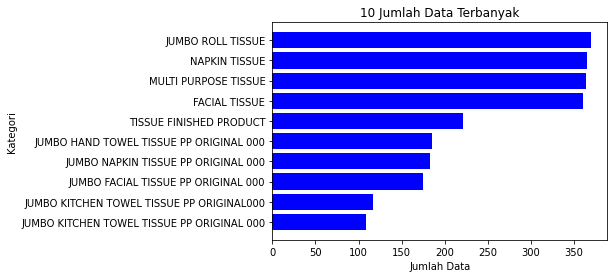

In [ ]:
df = pd.read_excel('DatasetPulp.xlsx')
count_df = pd.DataFrame({'count': df.groupby(['Barang']).size()}).reset_index()
top_10_counts = count_df.sort_values('count', ascending=False).head(10)
plt.barh(top_10_counts['Barang'], top_10_counts['count'], color='blue')
plt.xlabel('Jumlah Data')
plt.ylabel('Kategori')
plt.title('10 Jumlah Data Terbanyak')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df.columns

Index(['Nomor PEB', 'Tanggal', 'Barang', 'Kode Barang', 'Jumlah Kms Brg',
       'Jenis Kms Brg', 'Produksi', 'Jenis Satuan', 'Jml Container',
       'Pelabuhan Muat', 'Pelabuhan Bongkar', 'Negara Penerima'],
      dtype='object')

In [ ]:
df=df.query('Barang == "JUMBO ROLL TISSUE"')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
2,3,2022-01-01,JUMBO ROLL TISSUE,48183000,484.0,RO,156.500,TNE,21,IDPWG,KRPUS,KR
6,7,2022-01-02,JUMBO ROLL TISSUE,48183000,320.0,RO,155.500,TNE,8,IDPWG,KRICH,KR
10,11,2022-01-03,JUMBO ROLL TISSUE,48183000,480.0,RO,156.500,TNE,12,IDPWG,KRICH,KR
15,16,2022-01-04,JUMBO ROLL TISSUE,48183000,320.0,RO,157.500,TNE,8,IDPWG,KRICH,KR
33,34,2022-01-05,JUMBO ROLL TISSUE,48183000,120.0,RO,156.500,TNE,3,IDPWG,KRICH,KR
...,...,...,...,...,...,...,...,...,...,...,...,...
3696,3697,2022-12-27,JUMBO ROLL TISSUE,48183000,120.0,RO,169.626,TNE,7,IDPWG,KRICH,KR
3702,3703,2022-12-28,JUMBO ROLL TISSUE,48183000,300.0,RO,170.097,TNE,5,IDPWG,KRICH,KR
3718,3719,2022-12-29,JUMBO ROLL TISSUE,48183000,240.0,RO,170.783,TNE,2,IDPWG,KRICH,KR
3728,3729,2022-12-30,JUMBO ROLL TISSUE,48183000,200.0,RO,171.809,TNE,5,IDPWG,KRPUS,KR


In [ ]:
df = df[['Tanggal','Produksi']]
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df['Tanggal']= pd.to_datetime(df.Tanggal)
df['Produksi'] = df['Produksi'].astype(float)

<ipython-input-30-61c2c543ce37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal']= pd.to_datetime(df.Tanggal)
<ipython-input-30-61c2c543ce37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Produksi'] = df['Produksi'].astype(float)


In [ ]:
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df.index = df.pop('Tanggal')
df

,Produksi
Tanggal,
2022-01-01,156.500
2022-01-02,155.500
2022-01-03,156.500
2022-01-04,157.500
2022-01-05,156.500
...,...
2022-12-27,169.626
2022-12-28,170.097
2022-12-29,170.783


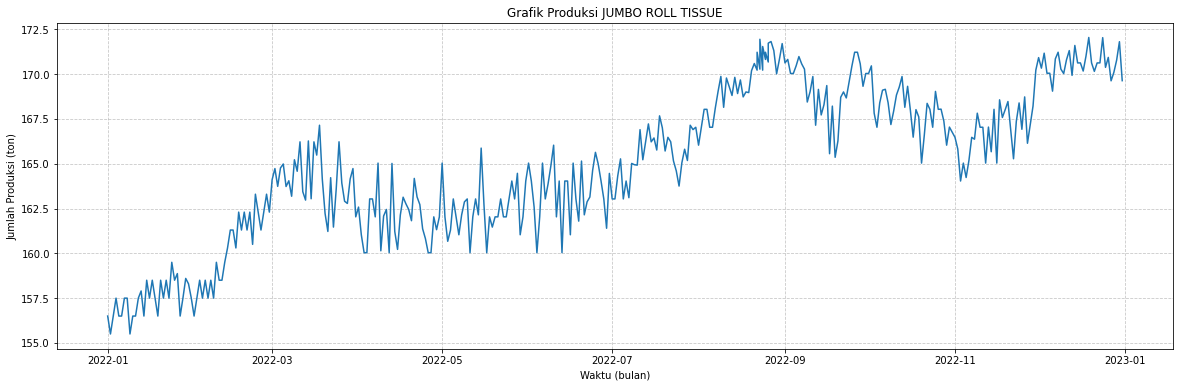

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df.index, df['Produksi'])
ax.set_xlabel('Waktu (bulan)')
ax.set_ylabel('Jumlah Produksi (ton)')
ax.set_title('Grafik Produksi JUMBO ROLL TISSUE')
ax.grid(linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.shape

(370, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [ ]:
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 277, test size: 93 


In [ ]:
time_stemp = 1
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
275/275 [==============================] - 6s 5ms/step - loss: 0.1126 - mean_squared_error: 0.1126
Epoch 2/50
275/275 [==============================] - 1s 5ms/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 3/50
275/275 [==============================] - 1s 3ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 4/50
275/275 [==============================] - 1s 2ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 5/50
275/275 [==============================] - 1s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 6/50
275/275 [==============================] - 1s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 7/50
275/275 [==============================] - 1s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 8/50
275/275 [==============================] - 1s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 9/50
275/275 [==============================] - 1s 3ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 10/5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score JUMBO ROLL TISSUE : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score JUMBO ROLL TISSUE : %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 4ms/step
Train Score JUMBO ROLL TISSUE : 1.58 RMSE
Test Score JUMBO ROLL TISSUE : 1.30 RMSE


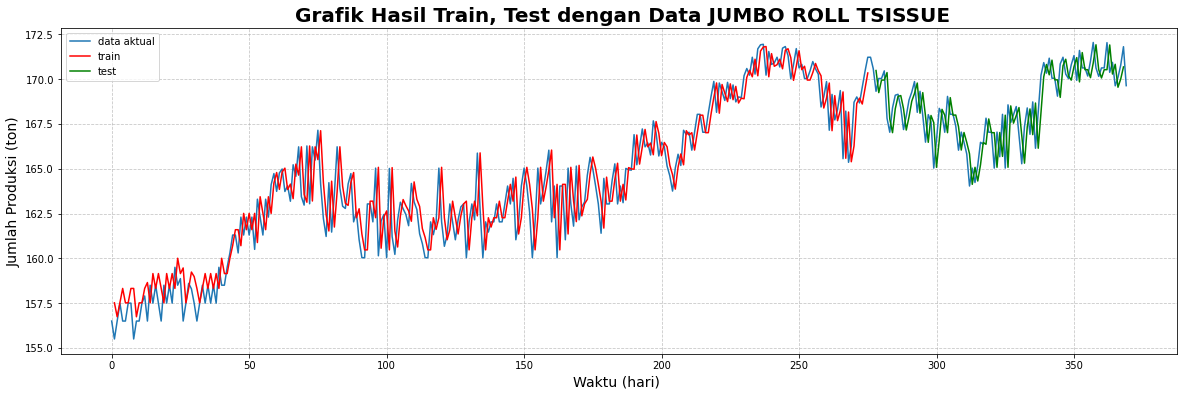

In [ ]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(df)-1, :] = testPredict
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(df),label='data aktual')
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='test')
plt.title(' Grafik Hasil Train, Test dengan Data JUMBO ROLL TSISSUE', fontsize=20 , fontweight='bold')
plt.xlabel('Waktu (hari) ', fontsize=14)
plt.ylabel('Jumlah Produksi (ton)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

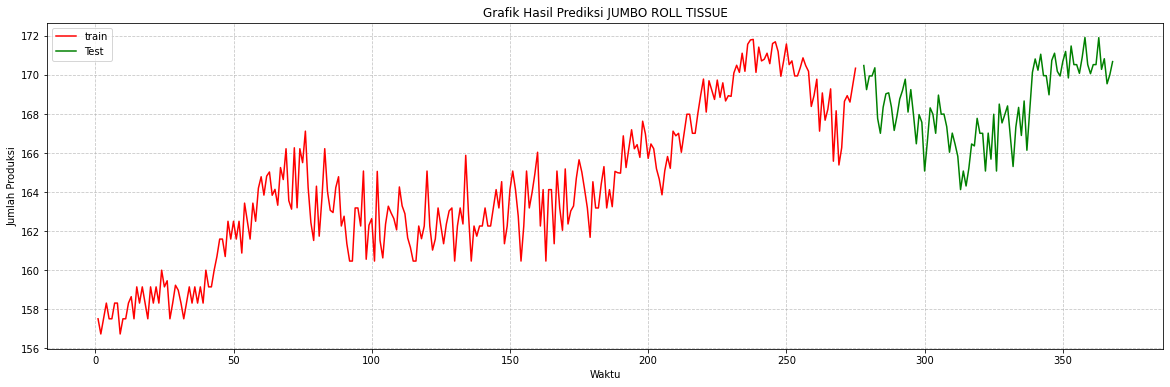

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='Test')
plt.title('Grafik Hasil Prediksi JUMBO ROLL TISSUE')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Produksi')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()